In [1]:
# importing the Dataset
import pandas as pd

messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [2]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y=pd.get_dummies(messages['label'])
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [9]:
#ham has index 0 and spam as 1 so taking spam column
y=y.iloc[:,1].values

In [10]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

here ham is taken as 0 and spam is 1

In [11]:
X.shape,y.shape

((5572, 6296), (5572,))

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((1115, 6296), (1115,), (4457, 6296), (4457,))

In [14]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

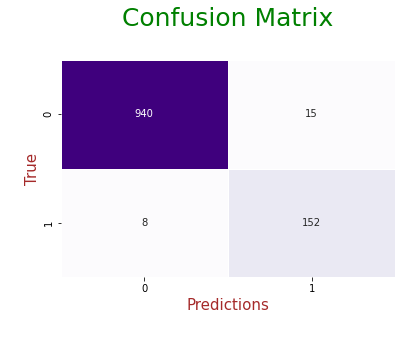

In [15]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
import matplotlib.pyplot as plt
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [16]:
accuracy_score(y_test, y_pred)

0.979372197309417

In [17]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.91      0.95      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



spam classification rate = 99 percent 

In [18]:
spam_messages = messages[messages['label'] =='spam'].reset_index(drop=True)
spam_messages

,label,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
742,spam,Want explicit SEX in 30 secs? Ring 02073162414...
743,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
744,spam,Had your contract mobile 11 Mnths? Latest Moto...
745,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
messages.iloc[8]

label                                                   spam
message    WINNER!! As a valued network customer you have...
Name: 8, dtype: object

In [20]:
messages.iloc[8]['message']

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [21]:
bag_of_words = []

review = re.sub('[^a-zA-Z]', ' ',messages.iloc[8]['message'])
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
bag_of_words.append(review)

bag_of_words

['winner valu network custom select receivea prize reward claim call claim code kl valid hour']

In [22]:
test_message = cv.transform(bag_of_words).toarray()
test_message

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
test_message_prediction = spam_detect_model.predict(test_message)
test_message_prediction

array([1], dtype=uint8)

In [24]:
if test_message_prediction[0] == 1:
    print("spam")
else:
    print('ham')

spam


In [25]:
for m in range(len(spam_messages)):
    bag_of_words = []

    review = re.sub('[^a-zA-Z]', ' ',messages.iloc[m]['message'])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    bag_of_words.append(review)
    test_message = cv.transform(bag_of_words).toarray()
    if test_message_prediction[0] == 1:
        print("spam")
    else:
        print('ham')

spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
spam
